In [1]:
# Below you will find the code for our mystery network, ready for your analysis
# Read the assignment instructions, and run through the code to figure out how to answer the questions
# Feel free to play with the values passed to the functions, but it is recommended not to change the code

In [2]:
# import the necessary libraries
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt
import pdb

In [3]:
#To ensure reproducibility
np.random.seed(11)

In [4]:
# Normally would be an informative comment
def myfunction(X):
    """
    If a number in X is less than 0, it is replaced by 0. If a number in X is greater than 1, it is replaced by 1.
    """
    
    # Normally would be an informative comment
    Y = X
    mask = (X < 0)
    Y[mask] = 0
    mask = (X > 1)
    Y[mask] = 1
    return Y
 
# Normally would be an informative comment
def helper(inputs):
    """
    The function gets a 2d np.array as input and append a new row of all 1's to it and returns the new array.
    Adds a bias term 
    """
    return np.append(inputs,np.ones((1,inputs.shape[1])),axis=0)

In [13]:
# test the previous cell
inputs  = ((0,0,0,0),(0,0,0,1),(0,0,1,0),(0,0,1,1),(0,1,0,0),(0,1,0,1),(0,1,1,0),(0,1,1,1),
           (1,0,0,0),(1,0,0,1),(1,0,1,0),(1,0,1,1),(1,1,0,0),(1,1,0,1),(1,1,1,0),(1,1,1,1))
# myfunction(np.array([-1.5, 0.2, 0.8, 1.5, 2.0]))
# 
# helper( np.array([[1, 2, 3]]))
# print(np.array(inputs))
# print(np.array(inputs).transpose().shape) # row 1 of inputs becomes column 1 of the inputs when transposed
print(helper(np.array(inputs).transpose()))

[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]


In [43]:
class task(object):
    """
    I would usually provide informative instructions and comments here, but that is not the point of 
    this assignment! Here, you need to analyze the code directly, using the PDP framework, and some insight.
    Answer the questions in the assignment instructions by analyzing the code below.
    """
    
    # Normally would be an informative comment
    def __init__(self,inputs,outputs):
        """
        You will be given inputs and desired outputs. You will transpose them to have 4rx16c input and 3rx16c output.
        """
    
        # our actual inputs will have 16 row and 4 columns, each row representing a point in spacec
        # our actual outputs will have 16 row and 3 columns, each row representing a point in space
        # self.inputs will have 4 rows and 16 columns, each column representing a point in space
        # self.outputs will have 3 rows and 16 columns, each column representing a point in space
        self.inputs  = np.array(inputs).transpose()
        self.outputs = np.array(outputs).transpose()
        
        # Checks if the number of columns in input and output are the same (since we transposed tehm, each column represents a point)
        assert self.inputs.shape[1] == self.outputs.shape[1], "Number of cases in input and output not equal."
            
        
    # Normally would be an informative comment
    def ncases(self):
        """
        Gives back the number of columns in self.inputs (which is np.array(inputs.transpose())) so how many input points we have
        Will give 16
        """
        return self.inputs.shape[1]
    
    # Normally would be an informative comment
    def ninputs(self):
        """
        How many rows do you have in self.inputs (which is np.array(inputs.transpose())) 
        Will give 4
        """
        return self.inputs.shape[0]
    
    # Normally would be an informative comment
    def noutputs(self):
        """
        How many rows do you have in self.outputs (which is np.array(outputs.transpose())) 
        Will give 3
        """
        return self.outputs.shape[0]

# Normally would be an informative comment
inputs  = ((0,0,0,0),(0,0,0,1),(0,0,1,0),(0,0,1,1),(0,1,0,0),(0,1,0,1),(0,1,1,0),(0,1,1,1),
           (1,0,0,0),(1,0,0,1),(1,0,1,0),(1,0,1,1),(1,1,0,0),(1,1,0,1),(1,1,1,0),(1,1,1,1))
outputs = ((0,0,0),(0,0,1),(0,1,0),(0,1,1),(1,0,0),(1,0,1),(1,1,0),(1,1,1),
           (1,1,1),(1,1,0),(1,0,1),(1,0,0),(0,1,1),(0,1,0),(0,0,1),(0,0,0))
ourtask = task(inputs,outputs)


In [44]:
class network(object):
    """
    I would usually provide informative instructions and comments here, but that is not the point of 
    this assignment! Here, you need to analyze the code directly, using the PDP framework, and some insight.
    Answer the questions in the assignment instructions by analyzing the code below.
    """
    
    # Normally would be an informative comment
    def __init__(self, task, N, eta, alpha):
        """
        Normally would be an informative specification for the function
        """
        self.task  = task
        self.N     = N 
        self.eta   = eta # learning rate
        self.alpha = alpha # standard deviation of the distribution of the random weights
        self.W0   = random.normal(scale=self.alpha,size=(self.N, self.task.ninputs()+1)) # random initialize the input to hidden layer weights, with self.N rows and self.task.ninputs()+1 columns
        self.W1   = random.normal(scale=self.alpha,size=(self.task.noutputs(),self.N+1)) # random initialize the hidden to output layer weights with self.task.noutputs() rows and self.N+1 columns
    
    # Normally would be an informative comment
    def forward(self):
        """
        Tensors are states of activations. 
        """
            
        # tensor0 = state of activation of the hidden layer neurons
        # myfunction will make it so that each activation will be between 0 and 1
        tensor0 = myfunction(np.dot(self.W0,helper(self.task.inputs))) 
                              
        # tensor1 = state of activation of the output layer neurons
        tensor1 = myfunction(np.dot(self.W1,helper(tensor0)))
                      
        return (tensor0,tensor1)
                           
    # Normally would be an informative comment
    def important_function(self,tensor1):
        """
        Normally would be an informative specification for the function
        """
                      
        return np.mean(np.sum((self.task.outputs - tensor1)**2,axis=0)) # mean of sum of squares of errors (what does this evan mean)
    
    # Normally would be an informative comment
    def one_loop(self):
        """
        Normally would be an informative specification for the function
        """
        # Normally would be an informative comment
        (tensor0,tensor1) = self.forward()
        error    = self.task.outputs - tensor1
        delta_W0 = np.dot(np.dot(self.W1[:,:-1].transpose(),error),helper(self.task.inputs).transpose())
        delta_W1 = np.dot(error,helper(tensor0).transpose())
        
        # Normally would be an informative comment
        self.W0 += self.eta*delta_W0  # hidden layer weights
        self.W1 += self.eta*delta_W1  # output layer weights
        # pdb.set_trace()
        
        return tensor1
    
    # Normally would be an informative comment
    def make_ready(self, M):
        """
        Normally would be an informative specification for the function
        """
        
        # Normally would be an informative comment
        important_values = np.zeros((M,))
        
        # Normally would be an informative comment
        for m in range(M):
            tensor1 = self.one_loop() # one loop of the training including the weight updates
            important_values[m] = self.important_function(tensor1)
        
        # Normally would be an informative comment
        plt.plot(important_values)
        plt.ylabel("Important function")
        plt.xlabel("Number of loops")
        plt.show()
        
        plt.imshow(self.W0)
        plt.show()
        
        plt.imshow(self.W1)
        plt.show()


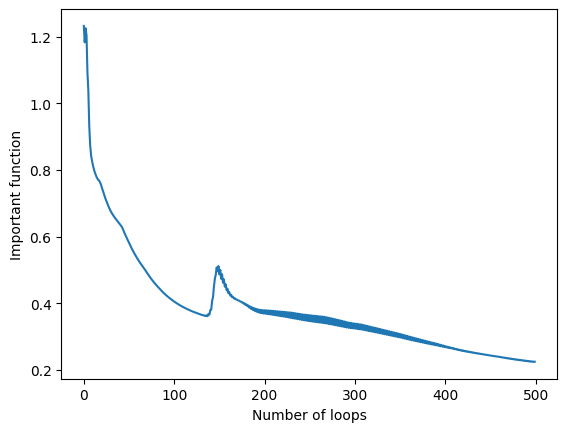

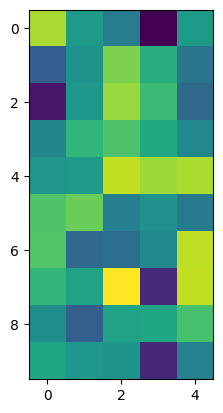

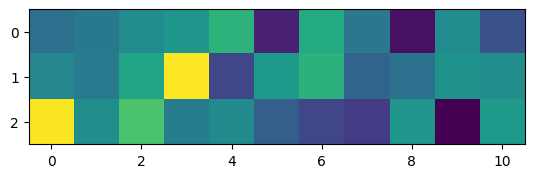

In [40]:
# Normally would be an informative commenty
N     = 10  # default: 100, but feel free to play with this value
eta   = 0.01 # default: 0.01, but feel free to play with this value
alpha = 1.0  # default: 1.0, but feel free to play with this value
M     = 500  # default: 500, but feel free to play with this value (it looks like make_ready might be the training function and M might be the number of epochs)

ournet = network(ourtask,N,eta,alpha)
ournet.make_ready(M)